In [1]:
import keras
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import pandas as pd
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

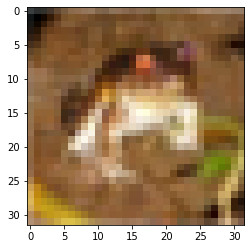

In [3]:
plt.imshow(x_train[0])

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn.fit(x_train, y_train, epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 2.0649 - accuracy: 0.2905
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3849 - accuracy: 0.5008
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1865 - accuracy: 0.5786
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0752 - accuracy: 0.62422s - loss: 1.0753  -
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9916 - accuracy: 0.6526
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9274 - accuracy: 0.6777
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8868 - accuracy: 0.6922
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8398 - accuracy: 0.7080
Epoch 9/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7990 - accuracy: 0.7234
Epoch 10/10
1563/1563 [=====================

[[739  17  54  20  40   6   4  16  65  39]
 [ 34 768  11  15   4   6  12   6  25 119]
 [ 68   8 612  73  78  65  36  35  14  11]
 [ 28   9 108 460  99 161  50  51  14  20]
 [ 31   2 117  55 644  36  35  68   7   5]
 [ 10   3 116 196  44 522  22  66   6  15]
 [  3   7 111  75  82  34 667  11   7   3]
 [ 20   1  62  45  95  44   6 705   6  16]
 [111  20  34  19  11   8   5   7 757  28]
 [ 40  75  18  10  10   6   6  24  26 785]]


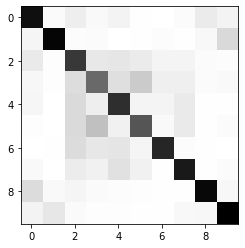

In [12]:
from sklearn.metrics import confusion_matrix
import pylab as pl
pred = cnn.predict(x_test)
prediction_binary = np.argmax(pred, axis=1)
#y_test_binary = np.argmax(y_test, axis=1)
cm=confusion_matrix(y_test,prediction_binary)
print(cm)
plt.imshow(cm, cmap='binary')

In [13]:
y_test[0]

3

Text(0.5, 1.0, '5')

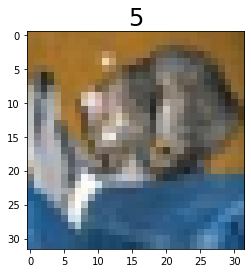

In [18]:
plt.imshow(x_test[0])
plt.title(prediction_binary[0],fontsize=24)